<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Расчёт-эффективности-обогащения" data-toc-modified-id="Расчёт-эффективности-обогащения-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Расчёт эффективности обогащения</a></span></li><li><span><a href="#Анализ-признаков,-отсутствующих-в-тестовой-выборке" data-toc-modified-id="Анализ-признаков,-отсутствующих-в-тестовой-выборке-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Анализ признаков, отсутствующих в тестовой выборке</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Заполнение-пропусков" data-toc-modified-id="Заполнение-пропусков-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Заполнение пропусков</a></span></li><li><span><a href="#Масштабирование-и-корреляция" data-toc-modified-id="Масштабирование-и-корреляция-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Масштабирование и корреляция</a></span></li><li><span><a href="#Поиск-выбросов" data-toc-modified-id="Поиск-выбросов-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Поиск выбросов</a></span></li></ul></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Концентрация-металлов-на-различных-этапах-очистки" data-toc-modified-id="Концентрация-металлов-на-различных-этапах-очистки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Концентрация металлов на различных этапах очистки</a></span></li><li><span><a href="#Распределение-гранул-сырья" data-toc-modified-id="Распределение-гранул-сырья-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Распределение гранул сырья</a></span></li><li><span><a href="#Суммарная-концентрация-всех-веществ-на-всех-стадиях" data-toc-modified-id="Суммарная-концентрация-всех-веществ-на-всех-стадиях-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Суммарная концентрация всех веществ на всех стадиях</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Функция-для-вычисления-sMAPE" data-toc-modified-id="Функция-для-вычисления-sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Функция для вычисления sMAPE</a></span></li><li><span><a href="#Обучение-и-подбор-модели" data-toc-modified-id="Обучение-и-подбор-модели-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение и подбор модели</a></span><ul class="toc-item"><li><span><a href="#Подготовка-данных-для-моделей" data-toc-modified-id="Подготовка-данных-для-моделей-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Подготовка данных для моделей</a></span></li><li><span><a href="#Обучение-и-подбор" data-toc-modified-id="Обучение-и-подбор-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Обучение и подбор</a></span></li></ul></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

**Цель:** подготовить прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды, она должна помочь оптимизировать производство.

**План**:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.


**Установка библиотек**

In [1]:
%pip install feature-engine -q

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%pip install imbalanced-learn - q

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '-'

[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd

from sklearn.metrics import mean_absolute_error, make_scorer

from sklearn.preprocessing import StandardScaler
from feature_engine.selection import DropCorrelatedFeatures, DropDuplicateFeatures

from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline

import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.impute import KNNImputer

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression

## Подготовка данных

### Изучение данных

In [4]:
data = []
links = ['9_0.csv', '9_1.csv', '9_2.csv']
for i in range(len(links)):
    data.append(pd.read_csv(links[i]))
    print(data[i].info())
    print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 88 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Unnamed: 0                                          14149 non-null  int64  
 1   date                                                14149 non-null  object 
 2   final.output.concentrate_ag                         14148 non-null  float64
 3   final.output.concentrate_pb                         14148 non-null  float64
 4   final.output.concentrate_sol                        13938 non-null  float64
 5   final.output.concentrate_au                         14149 non-null  float64
 6   final.output.recovery                               14149 non-null  float64
 7   final.output.tail_ag                                14149 non-null  float64
 8   final.output.tail_pb                                14049 non-null  float64


Итак, исходный датасет разделён на тренировочную и тестовую выборку в пропорции 3:1. Заметны пропуски в большом количестве столбцов. В обучающей выборке 87 столбцов, а в тестовой - 53. Это связано с тем, что в тестовой выборке нет признаков, которые рассчитываются из исходных данных и нет целевых признаков. Интересно, что все столбцы типа данных float(за исключением date, который находится в object).

### Расчёт эффективности обогащения

In [5]:
recovery = (data[0]['rougher.output.concentrate_au']*(data[0]['rougher.input.feed_au'] - data[0]['rougher.output.tail_au'])) / (data[0]['rougher.input.feed_au']*(data[0]['rougher.output.concentrate_au'] - data[0]['rougher.output.tail_au'])) * 100

mae_score = mean_absolute_error(recovery, data[0]['rougher.output.recovery'])

print('Метрика MAE:', mae_score)

Метрика MAE: 9.730101616170628e-15


Метрика MAE равна 9.74*10^(-15), что очень мало, соответственно эффективность обогащения рассчитана правильно

### Анализ признаков, отсутствующих в тестовой выборке

In [6]:
only_train_features = sorted(list(set(data[0].columns) - set(data[1].columns)))
print(only_train_features)

['final.output.concentrate_ag', 'final.output.concentrate_au', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_au', 'final.output.tail_pb', 'final.output.tail_sol', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au', 'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol', 'rougher.calculation.au_pb_ratio', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'rougher.calculation.sulfate_to_au_concentrate', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_au', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'rougher.output.recovery', 'rougher.output.tail_ag', 'rougher.output.tail_au', 'rougher.output.tail_pb', 'rougher.output.tail

Столбцы, непопавшие в тестовую выборку, делятся на два типа: *output* и *calculation*. В условии задачи сказано, что некоторые столбцы замеряются/рассчитываются позже. Скорее всего, столбцы типа *calculation* как раз расчётные, именно поэтому они не вошли в тестовую выборку. Логично предположить, что столбцы типа *output* замеряются позже, поэтому не вошли в тестовую выборку. Более того, столбцы *rougher.output.recovery* и *final.output.recovery* - целевые, поэтому их необходимо добавить в тестовую выборку из таблицы с исходными данными. Добавим их:

In [7]:
data[1] = data[1].merge(data[2][['date', 'final.output.recovery', 'rougher.output.recovery']], on='date')

Для того, чтобы модели работали стабильно, необходимо, чтобы обучающая и тестовая выборка имели равное количество столбцов. ПОэтому необходимо удалить из обучающей выборки столбцы, которые не входят в тестовую. Также сразу удалим столбцы с датой, они нам больше не нужны:

In [8]:
only_train_features = sorted(list(set(data[0].columns) - set(data[1].columns)))
data[0] = data[0].drop(only_train_features, axis=1)
data[0] = data[0].drop('date', axis=1)
data[1] = data[1].drop('date', axis=1)




### Предобработка данных

Этапы предобработки:
1. Кодирование - в наших данных категориальных признаков нет
2. Заполнение пропусков - необходимый этап, пропуски у нас имеются
3. Поиск выбросов - необходимо проверить на наличие выбросов
4. Масштабирование - необходимо масштабировать данные
5. Проверка на корреляцию - необходимо проверить столбцы на корреляцию

Для предобработки будем использовать пайплайн:

#### Заполнение пропусков

Так как в условии сказано, что близкие по времени данные часто совпадают, то логично было бы заполнить пропуски средним значением ближайших соседей. Специально для этого существует метод KNN - k ближайших соседей.

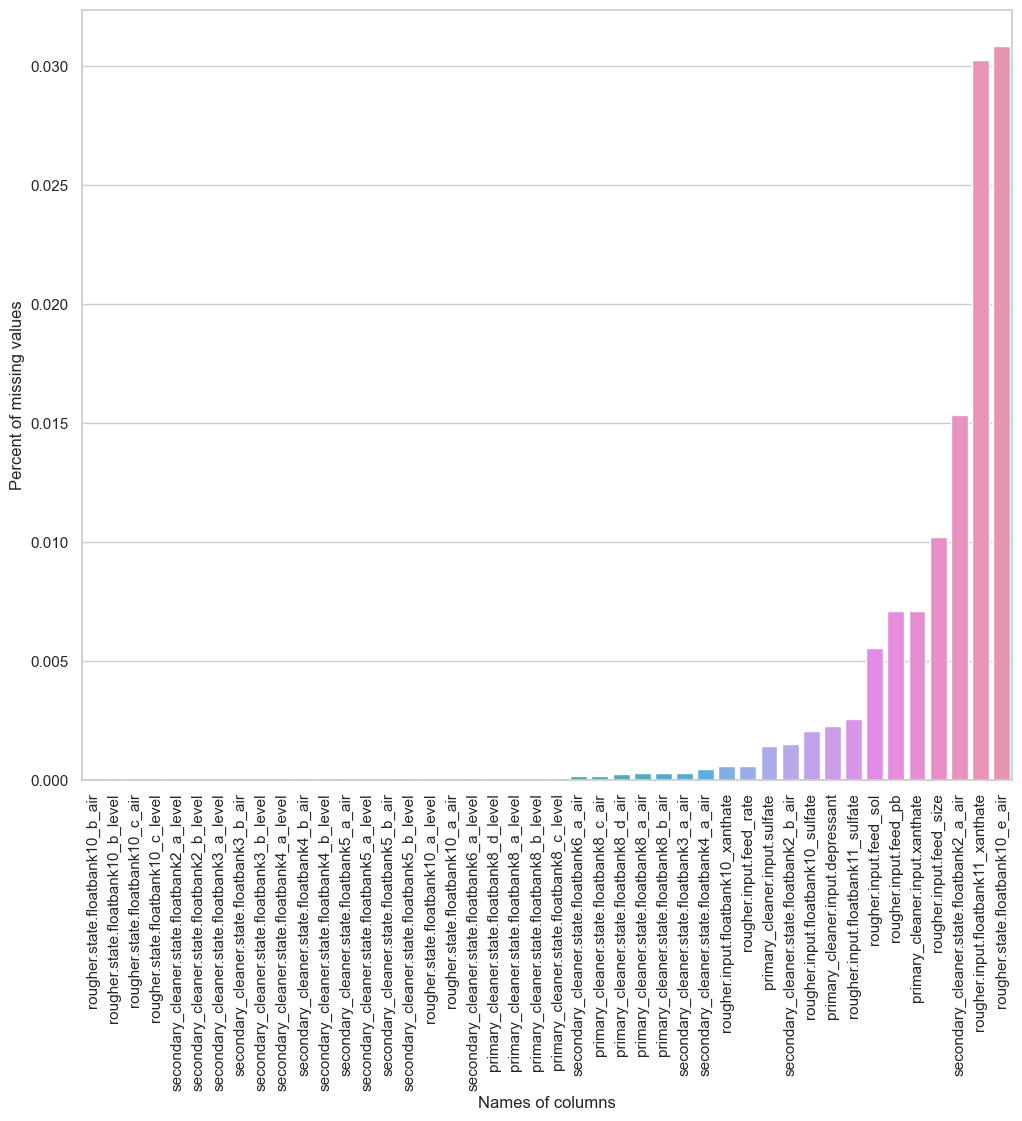

In [9]:
missing_values = data[0].isnull().sum() / len(data[0])
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)

missing_values = missing_values.to_frame()
missing_values.columns = ['Percent of missing values']
missing_values.index.names = ['Names of columns']
missing_values['Names of columns'] = missing_values.index

sns.set(rc={"figure.figsize":( 12 , 10 )})
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Names of columns', y = 'Percent of missing values', data=missing_values)
plt.xticks(rotation = 90)
plt.show()

Можно заметить, что пропуски ни в одном случае не достигают значения в 3%, то есть можно было бы и просто удалить строки с пропущенными значениями, однако, если есть возможность, лучше заполнить.

#### Масштабирование и корреляция

Масштабирование будем производить при помощи StandardScaler, корреляцию уберем при помощи DropCorrelatedFeatures.

In [10]:
pipeline = make_pipeline(StandardScaler(), DropCorrelatedFeatures(), DropDuplicateFeatures(), KNNImputer())

На данном этапе получился следующий пайплайн, в него добавлен DropDuplicatedFeatures, отвечающий за удаление дубликатов.

#### Поиск выбросов

Проверим самые важные колонки на выбросы

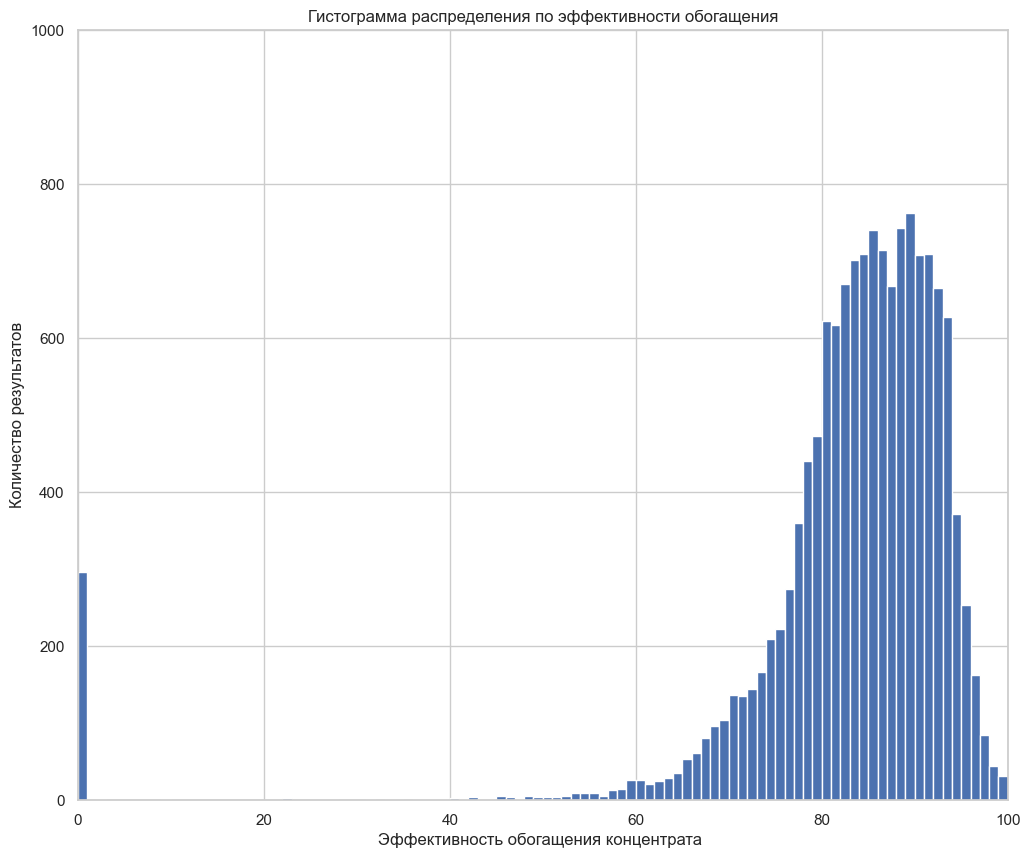

In [11]:
plt.figure(figsize=[12, 10])

plt.hist(data[0]['rougher.output.recovery'], bins=100)

plt.xlim([0, 100])
plt.ylim([0, 1000])

plt.xlabel("Эффективность обогащения концентрата ")
plt.ylabel("Количество результатов")

plt.title("Гистограмма распределения по эффективности обогащения")
plt.show()

Заметна аномалия в 0.

In [12]:
data[0][data[0]['rougher.output.recovery'] == 0]

,Unnamed: 0,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
45,45,68.403877,131.251366,13.969457,7.25,1.203034,1601.674776,-500.285160,1600.151967,-499.633542,...,14.025588,-550.404242,12.028925,-550.570104,10.052072,-500.797905,7.984500,-499.581046,11.982025,-599.161228
46,46,70.675633,141.184039,13.978607,7.25,1.248254,1604.852903,-500.922517,1603.005456,-499.631837,...,14.094808,-550.676337,12.004728,-550.496522,9.953139,-500.330920,8.012074,-500.133530,11.975316,-598.839683
47,47,55.088448,126.397495,12.709727,7.25,1.229626,1601.301169,-498.725777,1605.370031,-500.644437,...,13.997488,-551.224653,11.971272,-550.095619,9.981163,-502.869109,7.941184,-500.623610,12.018837,-600.916665
48,48,41.962008,69.411904,7.443190,7.25,0.926251,1600.850721,-502.596676,1600.924370,-497.882595,...,14.006476,-549.388727,11.975967,-550.778624,9.989726,-499.607365,7.958252,-498.882560,11.967977,-599.440603
49,49,49.884856,116.517762,13.259887,7.25,1.157176,1598.329965,-500.077594,1600.016229,-500.980439,...,13.984906,-550.563329,11.999730,-550.549773,9.941869,-503.282068,8.018850,-500.970716,11.991078,-598.475929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10330,10330,83.597741,140.156548,8.972009,8.55,1.321324,1599.935949,-499.990468,1601.117587,-500.077609,...,19.999169,-502.266441,14.943901,-500.386063,10.998883,-499.846204,8.972741,-500.118532,10.966205,-500.707126
10331,10331,84.738648,146.528194,8.985193,8.55,1.310371,1599.470203,-499.723402,1599.302334,-500.093824,...,19.961164,-499.274851,14.950879,-499.891798,11.010768,-494.562898,9.028307,-499.007596,10.978016,-497.924873
10332,10332,73.519948,157.102305,8.376329,8.55,1.357840,1599.873531,-500.066780,1601.936843,-499.835737,...,20.013736,-499.502171,14.957857,-499.873967,11.034954,-493.250025,9.029441,-480.953533,11.021042,-499.685577
10333,10333,78.415342,156.601307,8.024253,8.55,1.384234,1601.139372,-500.230303,1599.542141,-500.862135,...,20.013476,-500.511253,14.964835,-500.084773,10.972473,-511.806312,8.991251,-500.706169,10.990072,-499.775802


Это явно какая - то ошибка, так как концентрация золото после флотации нулевая, а финишная концентрация больше нуля. Эти данные необходимо удалить.

In [13]:
data[0] = data[0].drop(data[0][data[0]['rougher.output.recovery'] == 0].index)

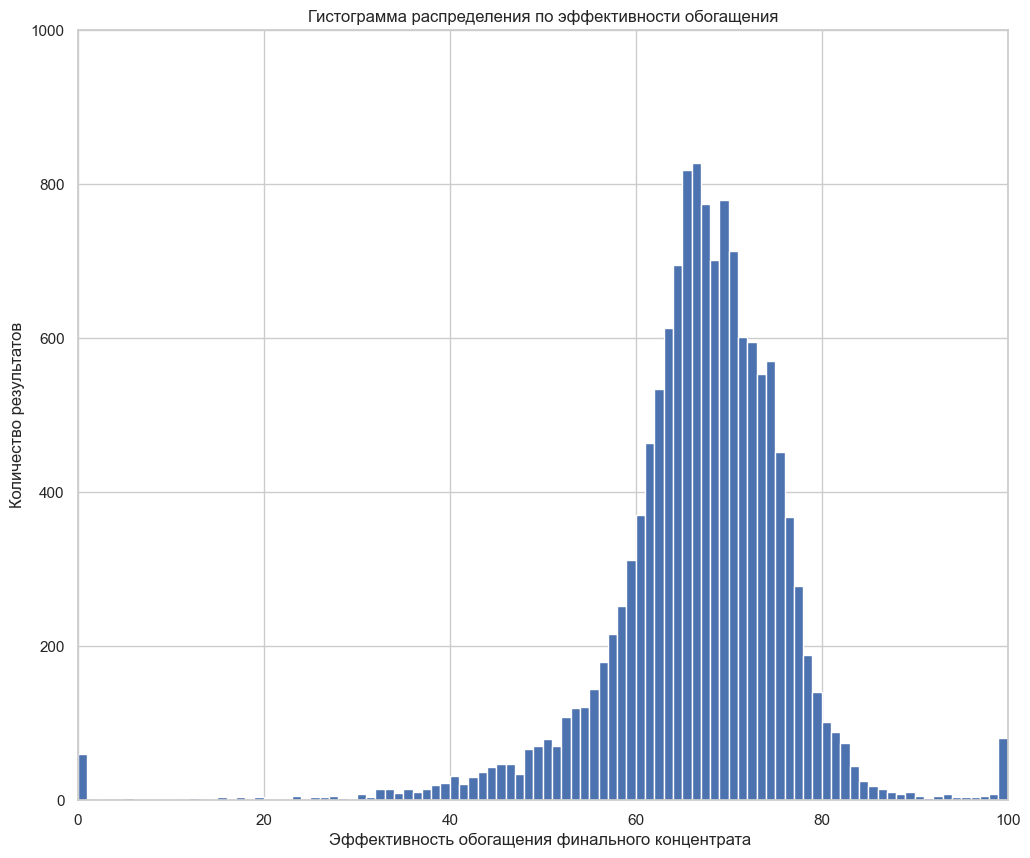

In [14]:
plt.figure(figsize=[12, 10])

plt.hist(data[0]['final.output.recovery'], bins=100)

plt.xlim([0, 100])
plt.ylim([0, 1000])

plt.xlabel("Эффективность обогащения финального концентрата ")
plt.ylabel("Количество результатов")

plt.title("Гистограмма распределения по эффективности обогащения")
plt.show()

Снова видны выбросы в 0

In [15]:
data[0] = data[0].drop(data[0][data[0]['final.output.recovery'] == 0].index)

Аналогично удалим выбросы в этих столбцах в тренировочной выборке

In [16]:
data[1] = data[1].drop(data[1][data[1]['rougher.output.recovery'] == 0].index)
data[1] = data[1].drop(data[1][data[1]['final.output.recovery'] == 0].index)

**Вывод**

На этом эатпе предобработка окончена, основные этапы проделаны. Ниже представлен полученный пайплайн:

In [17]:
pipeline
pipeline.steps.append(('clf', DummyRegressor()))
pipeline

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('dropcorrelatedfeatures', DropCorrelatedFeatures()),
                ('dropduplicatefeatures', DropDuplicateFeatures()),
                ('knnimputer', KNNImputer()), ('clf', DummyRegressor())])

## Анализ данных

### Концентрация металлов на различных этапах очистки

**1. Золото**

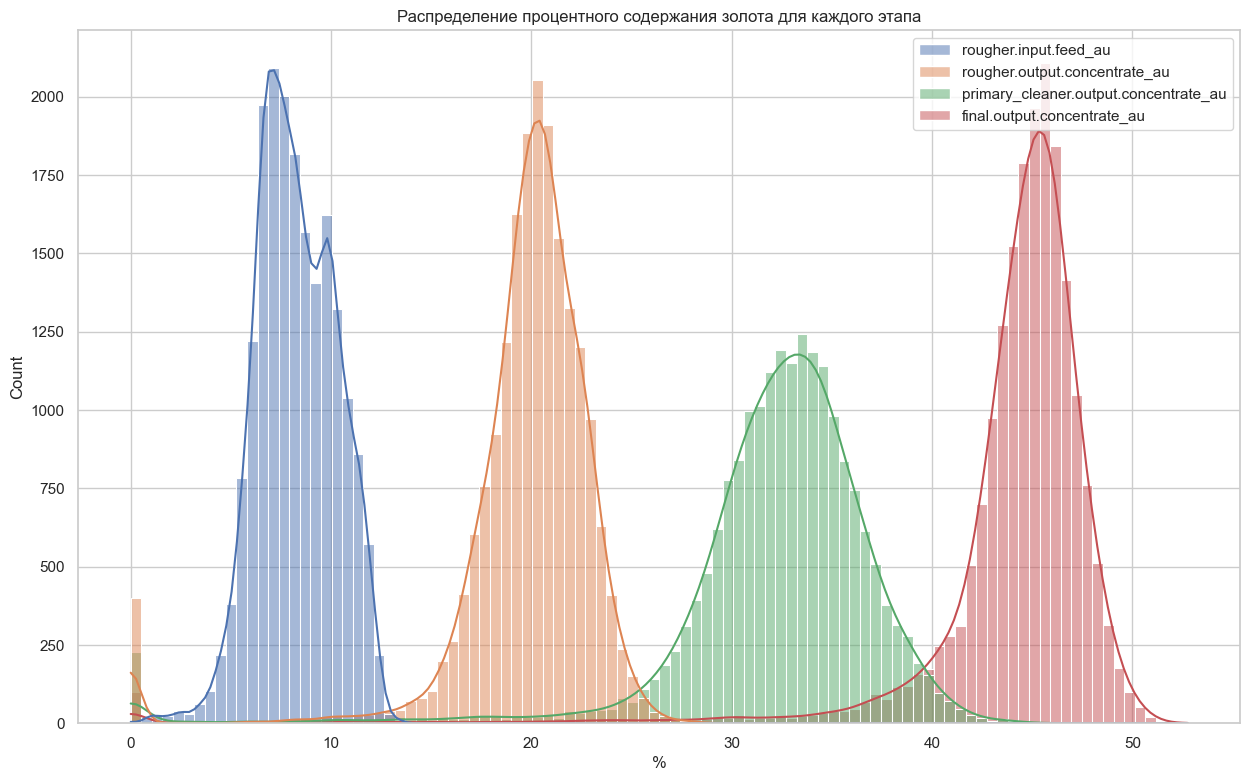

In [19]:
plt.figure(figsize=(15, 9))
sns.histplot(data[2][['rougher.input.feed_au', 
                      'rougher.output.concentrate_au', 
                      'primary_cleaner.output.concentrate_au', 
                      'final.output.concentrate_au']], kde=True, bins=100)
plt.title('Распределение процентного содержания золота для каждого этапа')
plt.xlabel('%');

**Вывод**

Уже после первого этапа обработки, концентрация золота возрастает в среднем в 2 раза и достигает 20%, и распредление становится более похожим на нормальное. После первичной очистки распредление становится более "рамазанным" в хвостах, а среднее содержание близится к 35%. В конце второй очистки большая часть измерений содержит 45% золота. В динакмике заметно, что процентное содержание золота увеличивается, значит все работает правильно.

**2. Серебро**

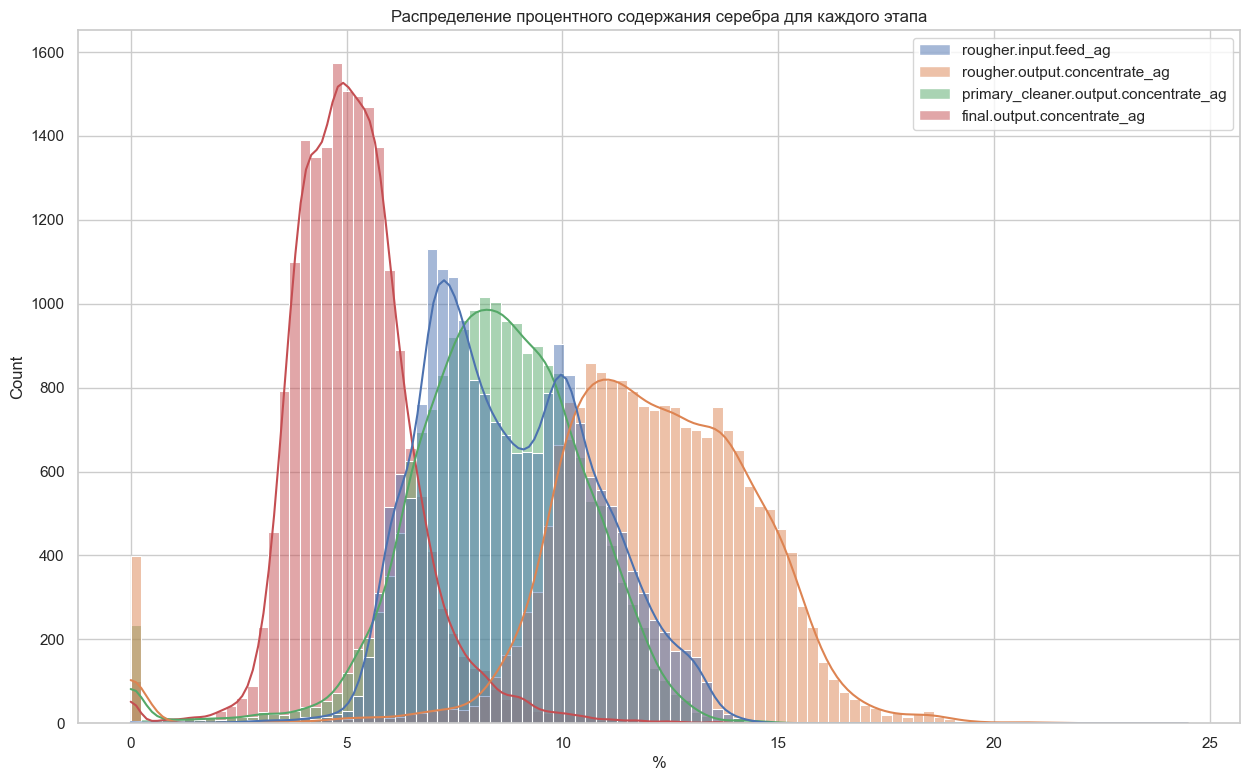

In [20]:
plt.figure(figsize=(15, 9))
sns.histplot(data[2][['rougher.input.feed_ag', 
                      'rougher.output.concentrate_ag', 
                      'primary_cleaner.output.concentrate_ag', 
                      'final.output.concentrate_ag']], kde=True, bins=100)
plt.title('Распределение процентного содержания серебра для каждого этапа')
plt.xlabel('%');

**Вывод**

После первого этапа мы увеличили содержание серебра на 5 - 10%, очистив смесь. Затем уже, после первой очистки, мы вернули содержание серебра к изначальным показателем, только распределение содержания стало напоминать нормальное. После второй очистки мы еще сильнее снизили содержания серебра, доведя его до 5%.

**3. Свинец**

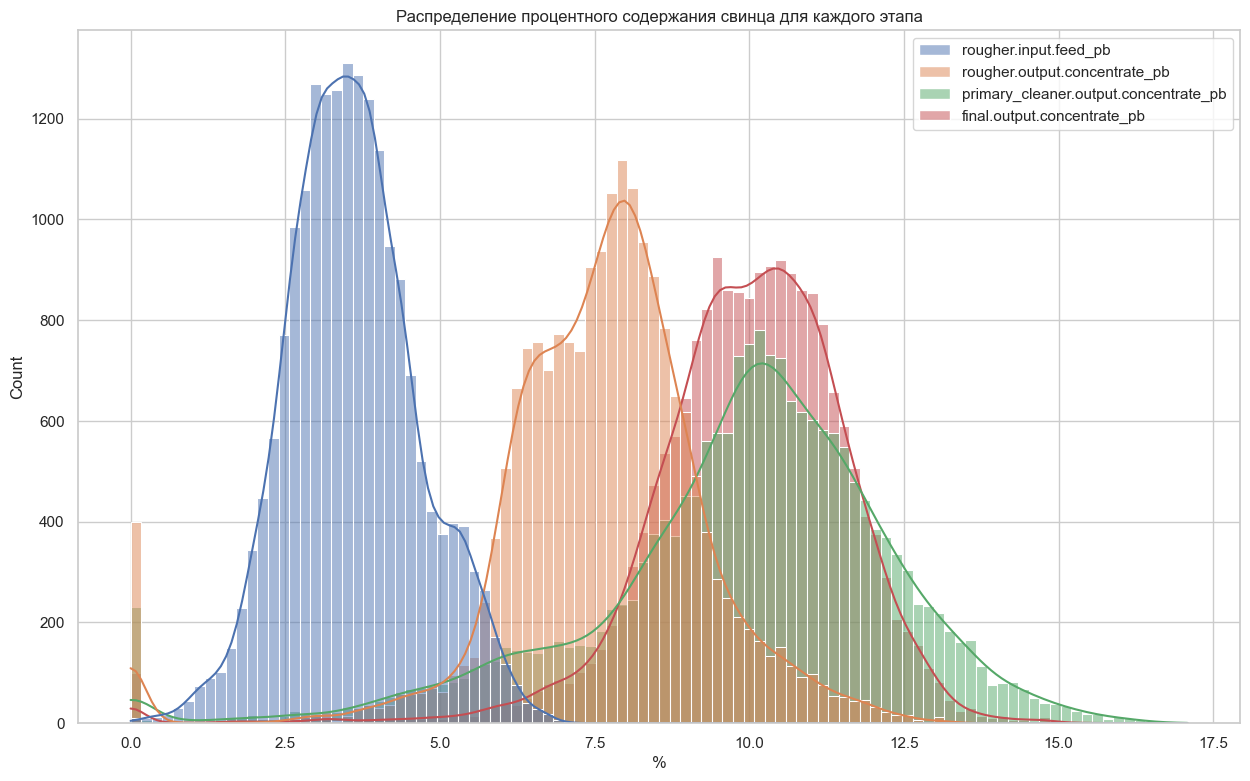

In [21]:
plt.figure(figsize=(15, 9))
sns.histplot(data[2][['rougher.input.feed_pb', 
                      'rougher.output.concentrate_pb', 
                      'primary_cleaner.output.concentrate_pb', 
                      'final.output.concentrate_pb']], kde=True, bins=100)
plt.title('Распределение процентного содержания свинца для каждого этапа')
plt.xlabel('%');

**Вывод**

После первого этапа мы увеличили содержание свинца до 7,5%, затем после первичной очистки увеличили еще, до 10%, а затем, в результате вторичной очистки, сохранили содержание около 10%, но распределение стало нормальным.

### Распределение гранул сырья

**1. Флотация**

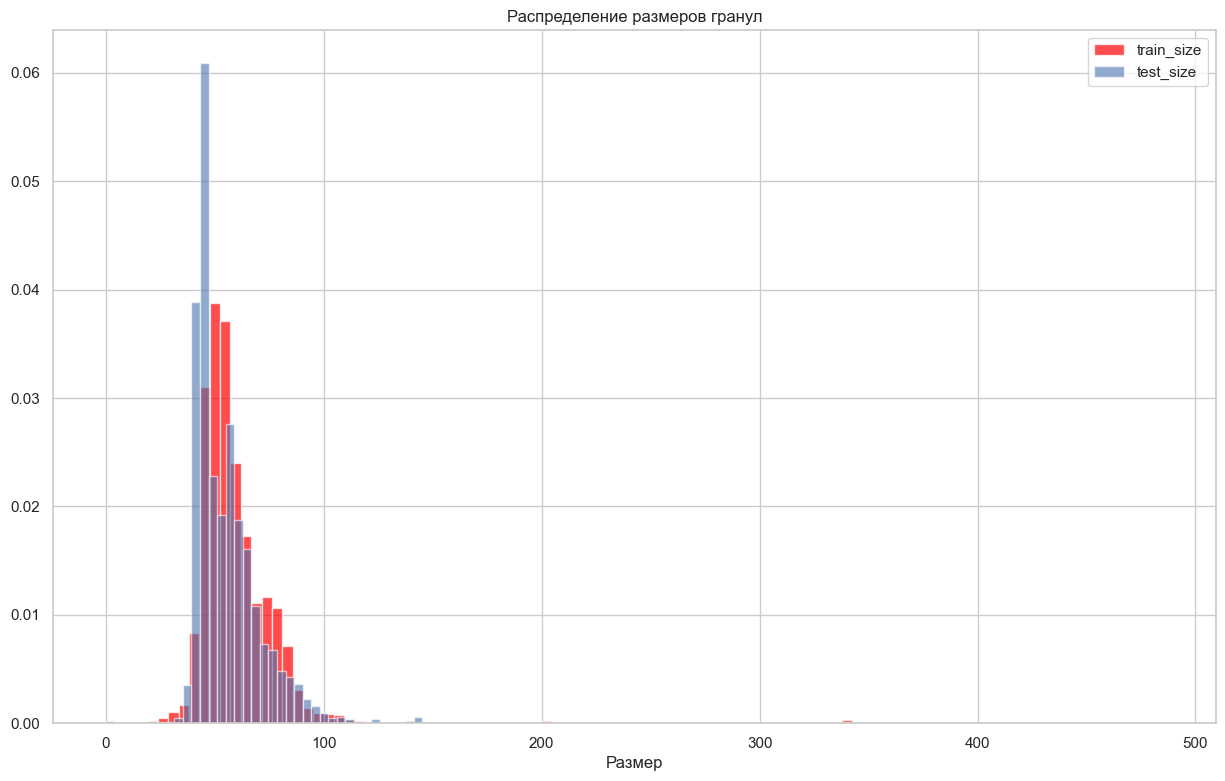

In [22]:
plt.figure(figsize=(15, 9))
plt.hist(data[0][['rougher.input.feed_size']], bins=100, density=True, alpha=0.7, label='train_size', color='red')
plt.hist(data[1][['rougher.input.feed_size']], bins=100, density=True, alpha=0.6, label='test_size')
plt.title('Распределение размеров гранул')
plt.xlabel('Размер')
plt.legend();

Распределение в целом похоже. То есть на флотацию подаются гранулы со схожим распредлением размеров на трейне и тесте.

**2. Первичная очистка**

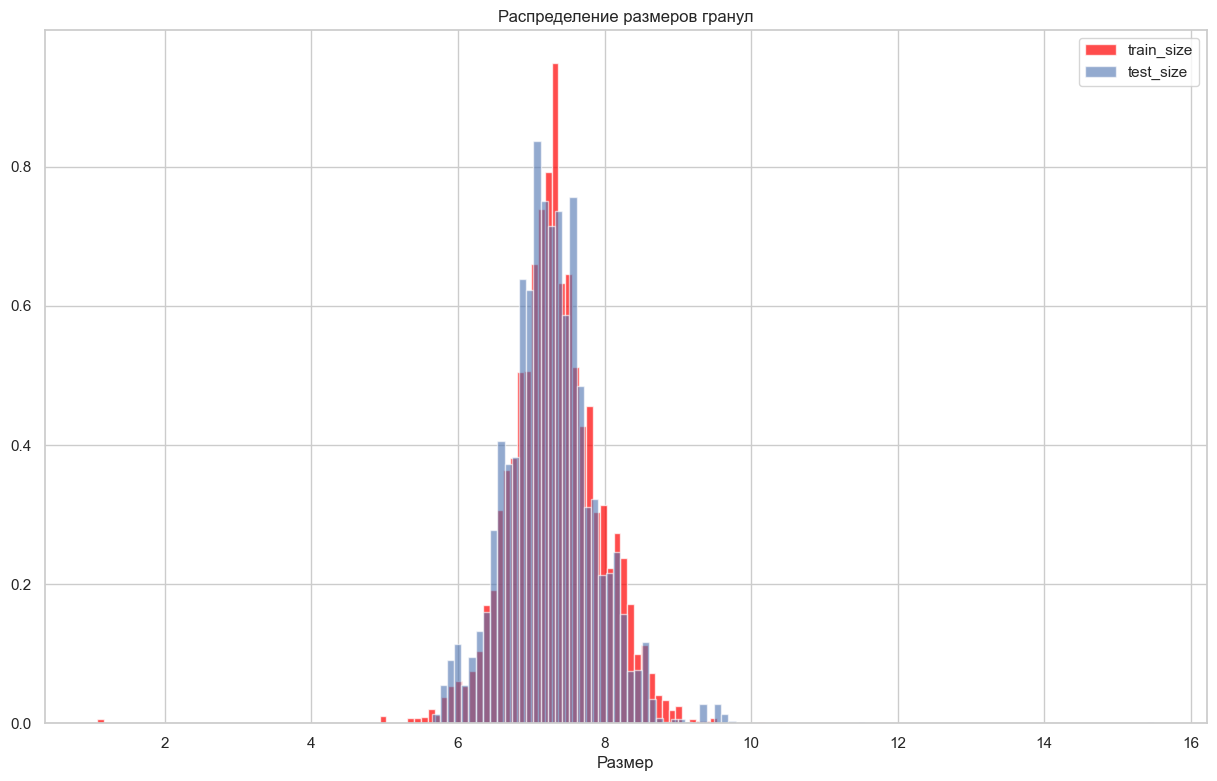

In [23]:
plt.figure(figsize=(15, 9))
plt.hist(data[0][['primary_cleaner.input.feed_size']], bins=100, density=True, alpha=0.7, label='train_size', color='red')
plt.hist(data[1][['primary_cleaner.input.feed_size']], bins=100, density=True, alpha=0.6, label='test_size')
plt.title('Распределение размеров гранул')
plt.xlabel('Размер')
plt.legend();

После флотации распредления размеров гранул в обеих выборках не только идентичны, но и близки к нормальному.

### Суммарная концентрация всех веществ на всех стадиях 

Для выполнения задания сначала добавим новые столбцы в таблицу. 

In [24]:
data[2]['final.sum'] = data[2]['final.output.concentrate_ag'] + data[2]['final.output.concentrate_pb'] + data[2]['final.output.concentrate_sol'] + data[2]['final.output.concentrate_au']
data[2]['primary_cleaner.sum'] = data[2]['primary_cleaner.output.concentrate_ag'] + data[2]['primary_cleaner.output.concentrate_pb'] + data[2]['primary_cleaner.output.concentrate_sol'] + data[2]['primary_cleaner.output.concentrate_au']
data[2]['rougher.sum'] = data[2]['rougher.output.concentrate_ag'] + data[2]['rougher.output.concentrate_pb'] + data[2]['rougher.output.concentrate_sol'] + data[2]['rougher.output.concentrate_au']
data[2]['start.sum'] = data[2]['rougher.input.feed_ag'] + data[2]['rougher.input.feed_pb'] + data[2]['rougher.input.feed_sol'] + data[2]['rougher.input.feed_au']

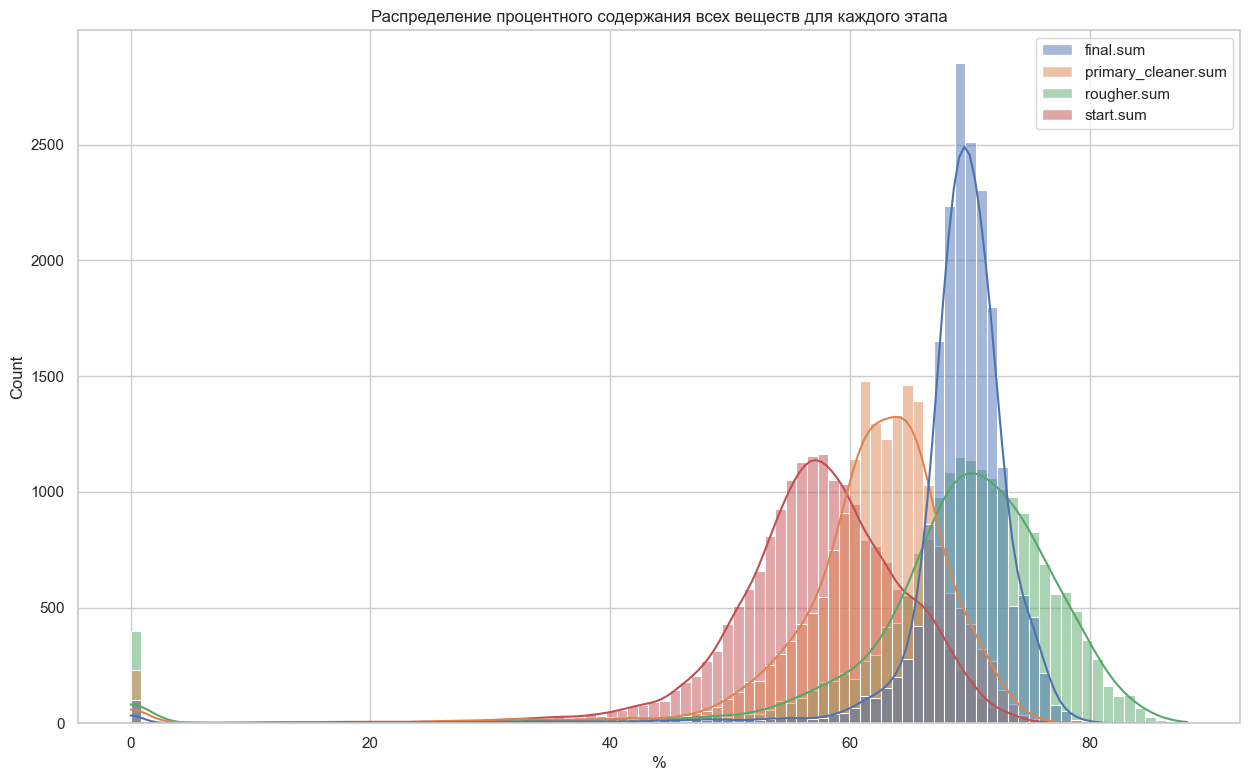

In [26]:
plt.figure(figsize=(15, 9))
sns.histplot(data[2][['final.sum', 
                      'primary_cleaner.sum', 
                      'rougher.sum', 
                      'start.sum']], kde=True, bins=100)
plt.title('Распределение процентного содержания всех веществ для каждого этапа')
plt.xlabel('%');

Во - первых, стоить отметить, что наша обработка работает, повышая исходное содержание металлов с примерно 60% до 70 - 75%. Во вторых, заметны выбросы в 0. Удалить их необходимо, так как они точно будут мешать работе модели. В исходной руде точно не могло быть нулевое содержание металлов, аналогично, если в исходной руде ненулевое содержание металлов, то ни один из этапов не может правратить это ненулевую концентрацию в ноль.

Чтобы решить эту проблему:
1. Создаем столбцы с суммой веществ по каждому этапу для тестовой и обучающей выборки
2. Удаляем аномалии
3. Удаляем добавленные столбцы

Так как тестовая и обучающая выборки содержат в себе данные о входе только для флотации, то обработаем только эти данные.

In [27]:
data[1]['start.sum'] = data[1]['rougher.input.feed_ag'] + data[1]['rougher.input.feed_pb'] + data[1]['rougher.input.feed_sol'] + data[1]['rougher.input.feed_au']
data[0]['start.sum'] = data[0]['rougher.input.feed_ag'] + data[0]['rougher.input.feed_pb'] + data[0]['rougher.input.feed_sol'] + data[0]['rougher.input.feed_au']

data[1] = data[1].drop(data[1][data[1]['start.sum'] == 0].index)
data[0] = data[0].drop(data[0][data[0]['start.sum'] == 0].index)

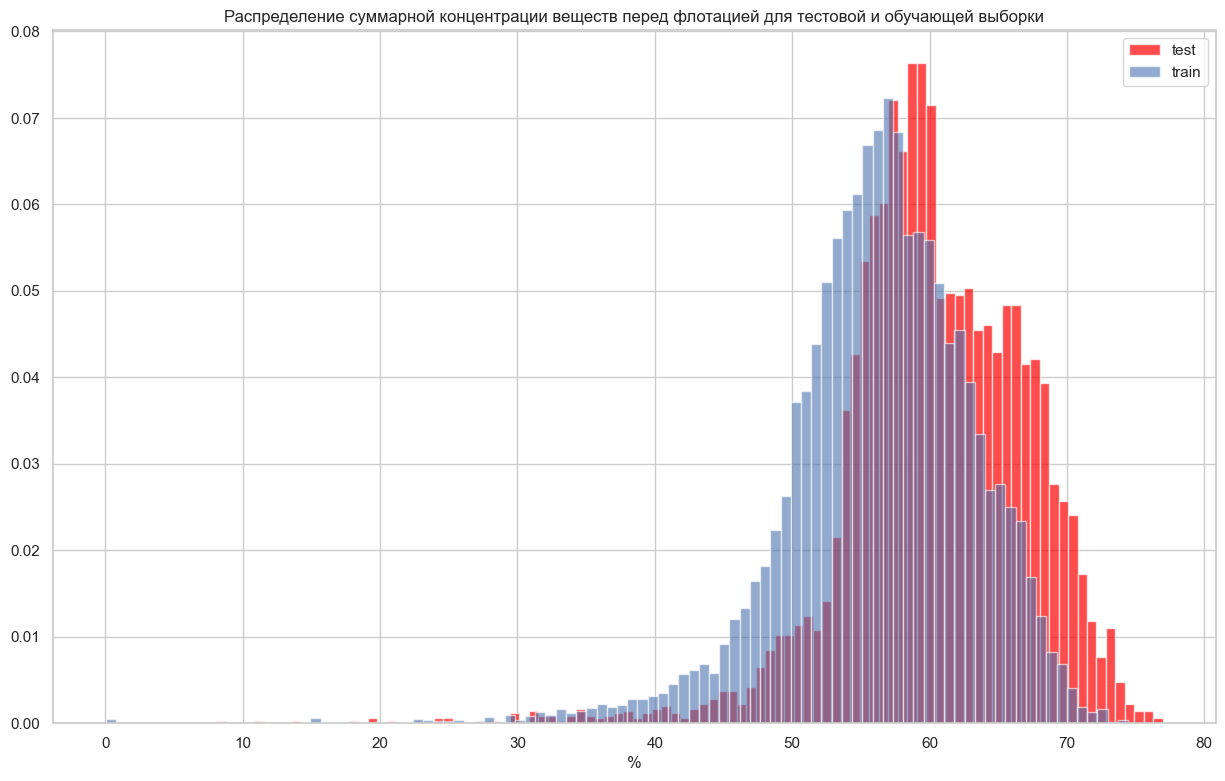

In [30]:
plt.figure(figsize=(15, 9))
plt.hist(data[1][['start.sum']], bins=100, density=True, alpha=0.7, label='test', color='red')
plt.hist(data[0][['start.sum']], bins=100, density=True, alpha=0.6, label='train')
plt.title('Распределение суммарной концентрации веществ перед флотацией для тестовой и обучающей выборки')
plt.xlabel('%')
plt.legend();

**Вывод**

Выбросов нет

## Модель

### Функция для вычисления sMAPE

In [31]:
def part_of_sMAPE(target, predict):
    predict = pd.Series(predict)
    return sum(2 * abs(target - predict) / (abs(target) + abs(predict))) / len(target) * 100

def sMAPE(sMAPE1, sMAPE2):
    return 0.25*sMAPE1 + 0.75*sMAPE2

### Обучение и подбор модели

#### Подготовка данных для моделей

Для начала нужно поделить данные. Во - первых, так как нам нужно предсказать 2 метрики, то необходимо сделать 2 модели, на вход которым будут подавать разные данные. Первый целевой признак - *rougher.output.recovery*. Соотвественно модель, которая будет это предсказывать, должна обучаться только на данных, известных нам до выполнения флотации, и предсказывать тоже только данным до флотации. Второй целевой признак - *final.output.recovery*. Модель, которая будет его предсказывать, работает уже по всем данным. Также для каждого полученного набора нужно разделить целевый признаки и обычные.

In [32]:
#отделяем данные для первой модели
data_rough = []
data_rough.append(data[0][['rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol', 'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate', 'rougher.input.floatbank11_sulfate', 'rougher.input.floatbank11_xanthate', 
       'rougher.output.recovery', 'rougher.state.floatbank10_a_air', 'rougher.state.floatbank10_a_level',
       'rougher.state.floatbank10_b_air', 'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air', 
       'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air', 'rougher.state.floatbank10_d_level',
       'rougher.state.floatbank10_e_air', 'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air', 
       'rougher.state.floatbank10_f_level']])
data_rough.append(data[1][['rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol', 'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate', 'rougher.input.floatbank11_sulfate', 'rougher.input.floatbank11_xanthate', 
       'rougher.output.recovery', 'rougher.state.floatbank10_a_air', 'rougher.state.floatbank10_a_level',
       'rougher.state.floatbank10_b_air', 'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air', 
       'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air', 'rougher.state.floatbank10_d_level',
       'rougher.state.floatbank10_e_air', 'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air', 
       'rougher.state.floatbank10_f_level']])

In [33]:
#отделяем целевые признаки от обычных для первой модели
data_rough.append(data_rough[0][['rougher.output.recovery']])
data_rough[0] = data_rough[0].drop('rougher.output.recovery', axis=1)

data_rough.append(data_rough[1][['rougher.output.recovery']])
data_rough[1] = data_rough[1].drop('rougher.output.recovery', axis=1)

In [34]:
#удаляем лишние столбцы
data[0] = data[0].drop(['start.sum'], axis=1)
data[1] = data[1].drop(['start.sum'], axis=1)

In [35]:
#отделяем целевые признаки от обычных для второй модели
data.append(data[0][['final.output.recovery']])
data[0] = data[0].drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)

data.append(data[1][['final.output.recovery']])
data[1] = data[1].drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)

Перед началом обучения необходимо заполнить пропуски в целевых признаках:

In [36]:
data_rough[2] = data_rough[2].ffill()
data_rough[3] = data_rough[3].ffill()
data[3] = data[3].ffill()
data[4] = data[4].ffill()

#### Обучение и подбор

**1. Предсказание результата флотации**

In [37]:
params = [
    {
        'clf': [RandomForestRegressor(random_state=28)],
        'clf__n_estimators':  [10,100,200],
        'clf__max_depth':  [3,5,15,25],
    },

    {
        'clf': [DecisionTreeRegressor(random_state=28)],
        'clf__max_depth': [3,5,15,25]
    }, 
    
    {
        'clf': [LinearRegression()],
        'clf__fit_intercept': [True, False]
    }
]

grid_first = RandomizedSearchCV(pipeline,
                    param_distributions=params,
                    n_iter=10,
                    cv=3,
                    verbose=1,
                    random_state=28,
                    scoring=make_scorer(part_of_sMAPE, greater_is_better=False),
                    n_jobs=-1)

In [38]:
grid_first.fit(data_rough[0], data_rough[2].values.ravel())

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('dropcorrelatedfeatures',
                                              DropCorrelatedFeatures()),
                                             ('dropduplicatefeatures',
                                              DropDuplicateFeatures()),
                                             ('knnimputer', KNNImputer()),
                                             ('clf', DummyRegressor())]),
                   n_jobs=-1,
                   param_distributions=[{'clf': [RandomForestRegressor(random_state=28)],
                                         'clf__max_depth': [3, 5, 15, 25],
                                         'clf__n_estimators': [10, 100, 200]},
                                        {'clf': [DecisionTreeRegressor(random_state=28)],
                                         'clf__max_depth': [3, 5, 15, 25]},
                                        {'clf': [LinearRegression()],
                                         'clf__fit_intercept': [True, False]}],
                   random_state=28,
                   scoring=make_scorer(part_of_sMAPE, greater_is_better=False),
                   verbose=1)

Лучшая модель по итогу кросс - валидации имеет следующие параметры:

In [39]:
grid_first.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('dropcorrelatedfeatures', DropCorrelatedFeatures()),
                ('dropduplicatefeatures', DropDuplicateFeatures()),
                ('knnimputer', KNNImputer()), ('clf', LinearRegression())])

Теперь используем ее для предсказания на тестовой выборке:

In [40]:
metric_first = part_of_sMAPE(data_rough[3].values.ravel(), grid_first.predict(data_rough[1]))
print('Полученное значение sMAPE:', metric_first)


Полученное значение sMAPE: 4.49789430202964


**2. Предсказание финального результата**

In [41]:
params = [
    {
        'clf': [RandomForestRegressor(random_state=28)],
        'clf__n_estimators':  [2,10,100,200],
        'clf__max_depth':  [3,5,15,25],
    },

    {
        'clf': [DecisionTreeRegressor(random_state=28)],
        'clf__max_depth': [3,5,15,25]
    }, 
    
    {
        'clf': [LinearRegression()],
        'clf__fit_intercept': [True, False]
    }
]

grid_second = RandomizedSearchCV(pipeline,
                    param_distributions=params,
                    n_iter=10,
                    cv=3,
                    verbose=1,
                    random_state=28,
                    scoring=make_scorer(part_of_sMAPE, greater_is_better=False),
                    n_jobs=-1)

In [42]:
grid_second.fit(data[0], data[3].values.ravel())

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('dropcorrelatedfeatures',
                                              DropCorrelatedFeatures()),
                                             ('dropduplicatefeatures',
                                              DropDuplicateFeatures()),
                                             ('knnimputer', KNNImputer()),
                                             ('clf', DummyRegressor())]),
                   n_jobs=-1,
                   param_distributions=[{'clf': [RandomForestRegressor(max_depth=5,
                                                                       n_estimators=2,
                                                                       random_state=28)],
                                         'clf__max_depth': [3, 5, 15, 25],
                                         'clf__n_estimators': [2, 10, 100,
                                                               200]},
                                        {'clf': [DecisionTreeRegressor(random_state=28)],
                                         'clf__max_depth': [3, 5, 15, 25]},
                                        {'clf': [LinearRegression()],
                                         'clf__fit_intercept': [True, False]}],
                   random_state=28,
                   scoring=make_scorer(part_of_sMAPE, greater_is_better=False),
                   verbose=1)

Лучшая модель по итогу кросс - валидации имеет следующие параметры:

In [43]:
grid_second.best_estimator_


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('dropcorrelatedfeatures', DropCorrelatedFeatures()),
                ('dropduplicatefeatures', DropDuplicateFeatures()),
                ('knnimputer', KNNImputer()),
                ('clf',
                 RandomForestRegressor(max_depth=5, n_estimators=2,
                                       random_state=28))])

Теперь используем ее для предсказания на тестовой выборке:

In [44]:
metric_second = part_of_sMAPE(data[4].values.ravel(), grid_second.predict(data[1]))
print('Полученное значение sMAPE:', metric_second)

Полученное значение sMAPE: 8.615234534957986


**3. Итоговое значение метрики**

In [45]:
print('Итоговое значение метрики sMAPE:', sMAPE(metric_first, metric_second))

Итоговое значение метрики sMAPE: 7.5858994767259


**4. Проверка на адекватность**

In [46]:
model_first = DummyRegressor()
model_first.fit(data_rough[0], data_rough[2])
metric_dummy_first = part_of_sMAPE(data_rough[3].values.ravel(), model_first.predict(data_rough[1]))

In [47]:
model_second = DummyRegressor()
model_second.fit(data[0], data[3])
metric_dummy_second = part_of_sMAPE(data[4].values.ravel(), model_second.predict(data[1]))

In [48]:
print('Итоговое значение метрики sMAPE для константной модели:', sMAPE(metric_dummy_first, metric_dummy_second))

Итоговое значение метрики sMAPE для константной модели: 7.766604067388502


**Вывод**

По итогам всех этапов было получено значение метрики sMAPE 7.16, что на 0.6 превосходит значение константной модели. Была проделана большая работа, данные были глубоко очищены от аномалий и пропусков, стандартизированы и проверены на корреляцию. Было отслежено много этапов, чтобы определить адекватность данных. С помощью пайплайна были выбраны лучшие модели и на их основе сделаны предсказания. Получен неплохой результат. 